In [1]:
import os
import cv2
import numpy as np
from tqdm import tqdm

REBUILD_DATA = True

class DogsVSCats:
    IMG_SIZE = 50
    CATS = "./kagglecatsanddogs_3367a/PetImages/Cat/"
    DOGS = "./kagglecatsanddogs_3367a/PetImages/Dog/"
    LABELS = {CATS: 0, DOGS: 1}
    training_data = []
    catcount = 0
    dogcount = 0
    
    def make_training_data(self):
        for label in self.LABELS:
            print(label)
            for f in tqdm(os.listdir(label)):
                try:
                    path = os.path.join(label, f)
                    img = cv2.imread(path, cv2.IMREAD_GRAYSCALE)
                    img = cv2.resize(img, (self.IMG_SIZE, self.IMG_SIZE))
                    self.training_data.append([np.array(img), np.eye(2)[self.LABELS[label]]])

                    if label == self.CATS:
                        self.catcount += 1
                    elif label == self.DOGS:
                        self.dogcount += 1
                except Exception as e:
                    pass
        
        np.random.shuffle(self.training_data)
        np.save("traing_data.npy", self.training_data)
        print(f"Cats: {self.catcount}")
        print(f"Dogs: {self.dogcount}")
        
if REBUILD_DATA:
    dogsvcats = DogsVSCats()
    dogsvcats.make_training_data()

./kagglecatsanddogs_3367a/PetImages/Cat/


100%|███████████████████████████████████████████████████| 12501/12501 [00:07<00:00, 1714.95it/s]


./kagglecatsanddogs_3367a/PetImages/Dog/


100%|███████████████████████████████████████████████████| 12501/12501 [00:07<00:00, 1568.80it/s]
/home/matt/.local/share/virtualenvs/Neural-Network-From-Scratch-JmgbtXSz/lib/python3.9/site-packages/numpy/lib/npyio.py:528: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  arr = np.asanyarray(arr)


Cats: 12476
Dogs: 12470


In [4]:
training_data = np.load("traing_data.npy", allow_pickle=True)

In [5]:
print(len(training_data))

24946


In [6]:
print(training_data[0])

[array([[130, 131, 129, ..., 122, 130, 133],
        [129, 135, 129, ..., 119, 136, 135],
        [133, 133, 129, ..., 121, 127, 138],
        ...,
        [136, 130, 131, ..., 123, 112, 106],
        [122, 122, 131, ..., 111, 110, 104],
        [113, 118, 131, ..., 107, 115, 107]], dtype=uint8) array([1., 0.])]


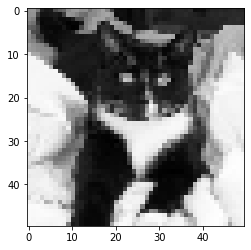

In [8]:
import matplotlib.pyplot as plt

plt.imshow(training_data[1][0], cmap='gray')
plt.show()